In [7]:
# load JSON
import json
import pandas as pd
import numpy as np
 
data = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
data = data.sort_values(by=['ds'])

df = data

df['year'], df['month'], df['day'] = df['ds'].dt.year, df['ds'].dt.month, df['ds'].dt.day
df['monthday'] = df['ds'].dt.date
df.head()

,ds,y,year,month,day,monthday
33509,2012-12-31 19:00:00,26.0,2012,12,31,2012-12-31
29997,2012-12-31 20:00:00,18.0,2012,12,31,2012-12-31
30093,2012-12-31 21:00:00,45.0,2012,12,31,2012-12-31
17776,2012-12-31 22:00:00,22.0,2012,12,31,2012-12-31
12561,2012-12-31 23:00:00,15.0,2012,12,31,2012-12-31


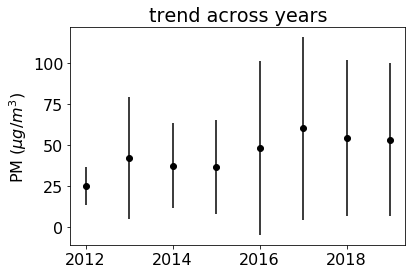

In [8]:
# trend across different years
yArr = list(range(2012,2020))

import matplotlib
import matplotlib.pyplot as plt

font = {'size': 16,             # font setting
       'weight':'normal'}       # font setting
matplotlib.rc('font', **font)   # font setting

pd.plotting.register_matplotlib_converters() # this resolves some issues with data type

counter = -1
for i in yArr:
    counter = counter + 1 
    dplot = df.loc[df['year'] == i]
    m = pd.DataFrame.mean(dplot.y)
    s = pd.DataFrame.std(dplot.y)
    plt.errorbar(i, m, yerr=s, fmt='ok');
    plt.title('trend between years')
    plt.ylabel('PM $(\u03BCg/m^3)$')

([<matplotlib.axis.XTick at 0x7f623367ab50>,
 <a list of 12 Text xticklabel objects>)

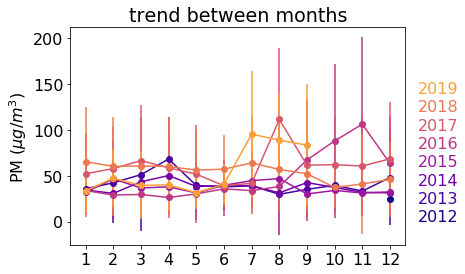

In [29]:
# trend across different months
import matplotlib.cm as cm
colors = cm.plasma(np.linspace(0, 1, 10))
counter = -1
mArr = list(range(1,13))

for i in yArr:
    counter = counter + 1 
    dplot = df.loc[df['year'] == i]
    aArr = []
    sArr = []
    for j in mArr:
        dplot2 = dplot.loc[dplot['month']==j]
        a = pd.DataFrame.mean(dplot2.y)
        s = pd.DataFrame.std(dplot2.y)
        aArr.append(a)
        sArr.append(s)
    plt.errorbar(mArr, aArr, yerr=sArr, color=colors[counter],fmt='o-');
    plt.text(13,counter*20,i,color=colors[counter])
plt.title('trend between months')
plt.ylabel('PM $(\u03BCg/m^3)$')
plt.xticks(range(1,13))    

In [ ]:
from fbprophet import Prophet
m = Prophet(changepoint_prior_scale=0.5) #  Increasing scale will make the trend more flexible:
m.fit(df)
future = m.make_future_dataframe(periods=48, freq='H')
forecast = m.predict(future)
pd.plotting.register_matplotlib_converters() # this resolves some issues with data type
fig = m.plot(forecast)
components_fig = m.plot_components(forecast)

In [ ]:
# PROPHET validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='6 days', period='2 days', horizon = '2 days') # horizon: forecast ; initial: training (default: 3x horizon); 
df_cv.head()

In [ ]:
# Performance metrics
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

# mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE)
# computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff).
# By default, 10% of the predictions in each window (can be changed) 
# high rollingwindow --> smoother average curve 

# Visualize cross-validation
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
